<a href="https://colab.research.google.com/github/naimish75/Stock-Prediction-using-LSTM/blob/main/Custom_LSTM_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
company = "GOOG"

start = dt.datetime(2012, 1, 1)
end = dt.datetime(2020, 1, 1)
data = pdr.DataReader(company, 'yahoo', start, end)
data

RemoteDataError: ignored

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
prediction_days = 60
X_train = []
y_train = []

In [ ]:
for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

In [ ]:
model.save("stock_pred.h5")

# Prediction

In [ ]:
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

test_data = pdr.DataReader(company, 'yahoo', test_start, test_end)

In [ ]:
actual_prices = test_data['Close'].values

In [ ]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model2.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

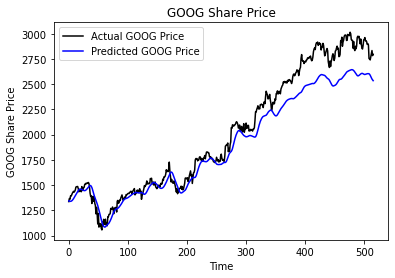

In [ ]:
plt.plot(actual_prices, color='black', label=f"Actual {company} Price")
plt.plot(predicted_prices, color='blue', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model("stock_pred.h5")

In [ ]:
# Next Day prediction
real_data = [model_inputs[len(model_inputs) + 2 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [ ]:
prediction = model2.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[2529.317]]
